# Data Visualization
## Advanced Python for Life Sciences @ Physalia courses (Summer 2025)
### Marco Chierici, Fondazione Bruno Kessler - Data Science For Health

# Objectives

- Be able to create simple plots with Matplotlib and tweak them
- Know about object-oriented vs pyplot interfaces of Matplotlib
- Be able to adapt gallery examples
- Know that other tools exist

## Repeatability/reproducibility

From [Claus O. Wilke: "Fundamentals of Data Visualization"](https://clauswilke.com/dataviz/):

> *One thing I have learned over the years is that automation is your friend. I
> think figures should be autogenerated as part of the data analysis pipeline
> (which should also be automated), and they should come out of the pipeline
> ready to be sent to the printer, no manual post-processing needed.*

- **No manual post-processing**. 
- There is not the one perfect language and **not the one perfect library** for everything.
- Within Python, many libraries exist:
  - [Matplotlib](https://matplotlib.org/gallery.html):
    probably the most standard and most widely used
  - [Seaborn](https://seaborn.pydata.org/examples/index.html):
    high-level interface to Matplotlib, statistical functions built in
  - [Altair](https://altair-viz.github.io/gallery/index.html):
    declarative visualization (R users will be more at home), statistics built in
  - [Plotly](https://plotly.com/python/):
    interactive graphs
  - [Bokeh](https://demo.bokeh.org/):
    also good for interactivity
  - [plotnine](https://plotnine.readthedocs.io/):
    implementation of a grammar of graphics in Python, it is based on [ggplot2](https://ggplot2.tidyverse.org/)
  - [ggplot](https://yhat.github.io/ggpy/):
    R users will be more at home
  - ...
- Two main families of libraries: procedural (e.g. Matplotlib) and declarative
  (using grammar of graphics).


## Why Matplotlib?

Matplotlib is perhaps the most "standard" Python plotting library and many other libraries are built on top of it.

# Getting started with Matplotlib

In [148]:
# this line tells Jupyter to display matplotlib figures in the notebook
%matplotlib inline

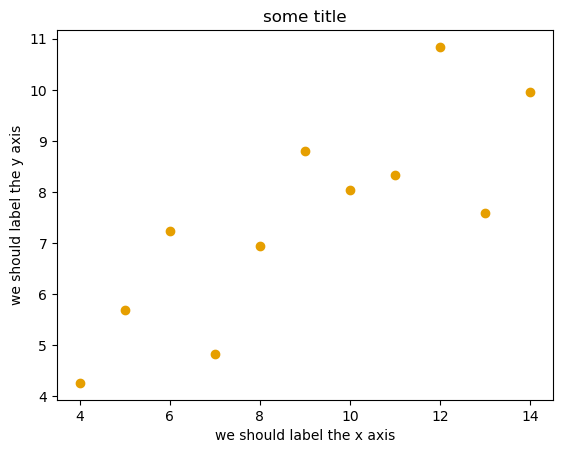

In [149]:
# canonical import for matplotlib
import matplotlib.pyplot as plt
# this line tells Jupyter to display matplotlib figures in the notebook
%matplotlib inline

# this is Anscombe's quartet dataset 1 from
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet
data_x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
data_y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

# create a blank figure (canvas)
fig, ax = plt.subplots()

# add a plot
ax.scatter(x=data_x, y=data_y, c="#E69F00")

# customize aesthetics
ax.set_xlabel("we should label the x axis")
ax.set_ylabel("we should label the y axis")
ax.set_title("some title")

plt.show()
# uncomment the next line if you would like to save the figure to disk
# fig.savefig("my-first-plot.png")

To add semi-automatic legends, we first need to add a label to the data used in the scatterplot. Then, we call `ax.legend()`:

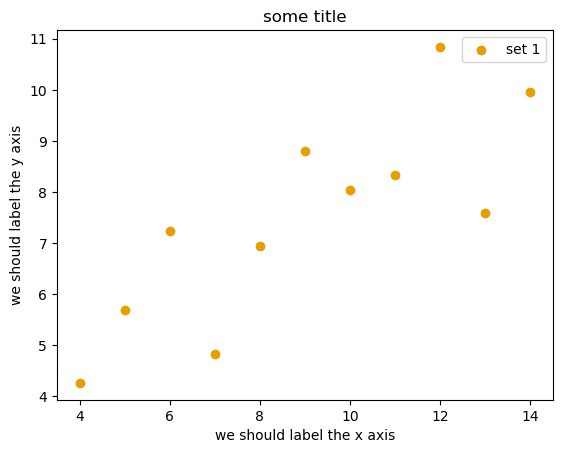

In [2]:
fig, ax = plt.subplots()

ax.scatter(x=data_x, y=data_y, c="#E69F00", label="set 1")

ax.set_xlabel("we should label the x axis")
ax.set_ylabel("we should label the y axis")
ax.set_title("some title")
ax.legend()

plt.show()

## Exercise

Extend the previous plot by also plotting this set of values but this time
  using a different color (`#56B4E9`):
  
  ```python
  data2_y = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
  ```

Then add another color (`#009E73`) which plots the second dataset, scaled
  by 2.0.
  ```python
  # here we multiply all elements of data2_y by 2.0
  data2_y_scaled = [y*2.0 for y in data2_y]
  ```

Try to add a legend to the plot with `ax.legend()`

Optionally save the plot to a file.

At the end it should look like [this one](https://drive.google.com/uc?export=view&id=1BRUlUkRArpVrFZwlnISccI4OuvTvsiVG)

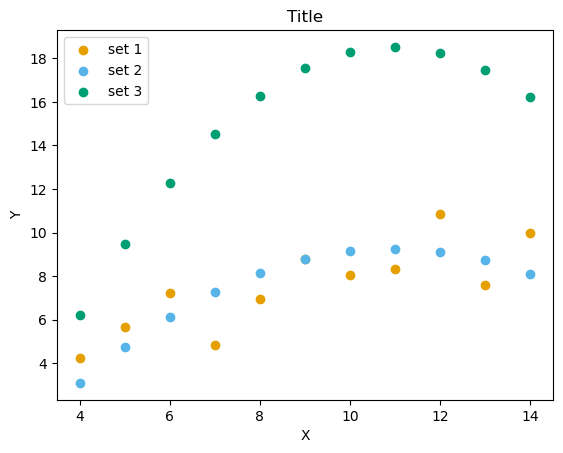

In [4]:
fig, ax = plt.subplots()

ax.scatter(x=data_x, y=data_y, c="#E69F00", label="set 1")

data2_y = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
ax.scatter(x=data_x, y=data2_y, c="#56B4E9", label="set 2")

data2_y_scaled = [y*2.0 for y in data2_y]
ax.scatter(x=data_x, y=data2_y_scaled, c="#009E73", label="set 3")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Title")
ax.legend()

plt.show()

### Why these colors?

This qualitative color palette is opimized for all color-vision
deficiencies, see
- <https://clauswilke.com/dataviz/color-pitfalls.html> and
- [Okabe, M., and K. Ito. 2008. "Color Universal Design (CUD):
How to Make Figures and Presentations That Are Friendly to Colorblind People."](http://jfly.iam.u-tokyo.ac.jp/color/).

---

## Matplotlib has two different interfaces

When plotting with Matplotlib, it is useful to know and understand that there are **two approaches** even though the reasons of this dual approach is outside the scope of this lesson.

The more modern option is an **object-oriented interface** (OO) - the one we just used. The `fig` and `ax` objects can be configured separately and passed around to functions:

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x=data_x, y=data_y, c="#E69F00")

ax.set_xlabel("we should label the x axis")
ax.set_ylabel("we should label the y axis")
ax.set_title("some title")

plt.show()

The more traditional option mimics MATLAB plotting and uses the **`pyplot` interface** - also known as MATLAB-like interface, where `plt` carries the global settings:

In [ ]:
fig = plt.figure(figsize=(8, 4), dpi=100)

plt.scatter(x=data_x, y=data_y, c="#E69F00")

plt.xlabel("we should label the x axis")
plt.ylabel("we should label the y axis")
plt.title("some title")

plt.show()

When searching for help on the internet, you will find both approaches.

Although the `pyplot` interface looks more compact, **I recommend to learn and use the object-oriented interface.**

Regardless of the interface you choose, **stick to it** in your code and avoid mixing interfaces.

---

# Further steps with Matplotlib

## Reading data

We will experiment with some example weather data obtained from [Norsk KlimaServiceSenter](https://seklima.met.no/observations/), Meteorologisk institutt (MET) (CC BY 4.0).

In this example, we will load a CSV file directly from the web instead of using a local file name.

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/coderefinery/data-visualization-python/main/data/tromso-daily.csv"
df_tromso = pd.read_csv(url)

df_tromso

,name,station,date,max temperature,min temperature,snow depth,precipitation
0,Tromso - Langnes,SN90490,09.10.2022,6.9,4.7,0,20.0
1,Tromso - Langnes,SN90490,10.10.2022,9.5,5.1,0,8.3
2,Tromso - Langnes,SN90490,11.10.2022,10.7,4.5,0,3.0
3,Tromso - Langnes,SN90490,12.10.2022,7.2,3.5,0,6.0
4,Tromso - Langnes,SN90490,13.10.2022,8.2,4.2,0,18.0
...,...,...,...,...,...,...,...
361,Tromso - Langnes,SN90490,05.10.2023,3.9,1.4,0,5.4
362,Tromso - Langnes,SN90490,06.10.2023,3.0,0.2,0,20.3
363,Tromso - Langnes,SN90490,07.10.2023,2.5,-0.6,0,13.5
364,Tromso - Langnes,SN90490,08.10.2023,4.0,0.8,0,9.0


## Combine dataframes

Using pandas we can **merge, join, concatenate, and compare** dataframes, see our dedicated lecture and also <https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html>.

Let us try to concatenate two dataframes: one for Tromsø weather data (which we already loaded into `df_tromso`) and one for Oslo, which we load right now:

In [6]:
url = "https://raw.githubusercontent.com/coderefinery/data-visualization-python/main/data/oslo-daily.csv"
df_oslo = pd.read_csv(url)
df_oslo

,name,station,date,max temperature,min temperature,snow depth,precipitation
0,Oslo - Blindern,SN18700,09.10.2022,14.0,3.1,0,0.0
1,Oslo - Blindern,SN18700,10.10.2022,13.6,7.7,0,0.0
2,Oslo - Blindern,SN18700,11.10.2022,13.0,1.5,0,1.3
3,Oslo - Blindern,SN18700,12.10.2022,11.7,0.6,0,0.0
4,Oslo - Blindern,SN18700,13.10.2022,11.0,9.6,0,3.5
...,...,...,...,...,...,...,...
361,Oslo - Blindern,SN18700,05.10.2023,14.0,7.2,0,0.0
362,Oslo - Blindern,SN18700,06.10.2023,15.0,5.7,0,2.3
363,Oslo - Blindern,SN18700,07.10.2023,12.4,3.0,0,4.7
364,Oslo - Blindern,SN18700,08.10.2023,11.8,-0.7,0,0.0


Now we can concatenate them:

In [8]:
# stacking two tables
df = pd.concat([df_tromso, df_oslo], axis=0, ignore_index=True)
df

,name,station,date,max temperature,min temperature,snow depth,precipitation
0,Tromso - Langnes,SN90490,09.10.2022,6.9,4.7,0,20.0
1,Tromso - Langnes,SN90490,10.10.2022,9.5,5.1,0,8.3
2,Tromso - Langnes,SN90490,11.10.2022,10.7,4.5,0,3.0
3,Tromso - Langnes,SN90490,12.10.2022,7.2,3.5,0,6.0
4,Tromso - Langnes,SN90490,13.10.2022,8.2,4.2,0,18.0
...,...,...,...,...,...,...,...
727,Oslo - Blindern,SN18700,05.10.2023,14.0,7.2,0,0.0
728,Oslo - Blindern,SN18700,06.10.2023,15.0,5.7,0,2.3
729,Oslo - Blindern,SN18700,07.10.2023,12.4,3.0,0,4.7
730,Oslo - Blindern,SN18700,08.10.2023,11.8,-0.7,0,0.0


`axis=0` above means to combine dataframes along the 1st axis, i.e., the rows.

## Data cleaning

Before plotting the data, we realize that the `date` data type is not inferred as date or time by pandas, but rather as "object" (in pandas lingo, that's a string).

In [ ]:
df["date"]

So we convert the dates into proper "datetime" format:

In [9]:
# replace dd.mm.yyyy to date format
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")
df["date"]

0     2022-10-09
1     2022-10-10
2     2022-10-11
3     2022-10-12
4     2022-10-13
         ...    
727   2023-10-05
728   2023-10-06
729   2023-10-07
730   2023-10-08
731   2023-10-09
Name: date, Length: 732, dtype: datetime64[ns]

## Exercise: Plotting data with Matplotlib

Consider now the Tromsø dataframe only.

1. Convert its 'date' column to proper date and time format. Then, use Matplotlib to create a simple line plot to visualize the maximum temperature as a function of time.

2. Add meaningful x & y axis labels and a title.

3. (Optional) Save the output figure to a file named "temperatures-tromso.png".

Hints:
* besides `scatter`, maplotlib has a more general `plot` function with similar arguments
* use the object-oriented interface (e.g., the one with `ax`), or the MATLAB-like interface (e.g., the one with `plt`), or both!
* see the beginning of the notebook for how to save figures to files

In [13]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

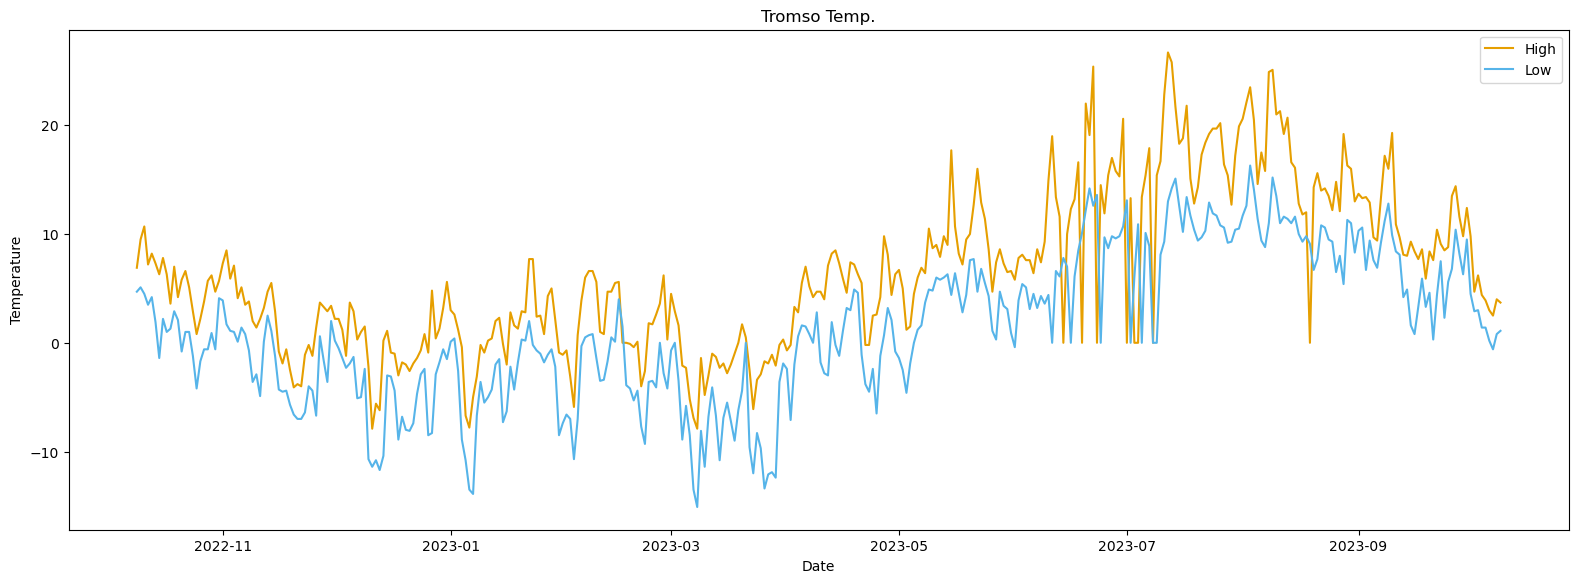

In [22]:
url = "https://raw.githubusercontent.com/coderefinery/data-visualization-python/main/data/tromso-daily.csv"
df_tromso = pd.read_csv(url)
df_tromso["date"] = pd.to_datetime(df_tromso["date"], format="%d.%m.%Y")

df_tromso

fig, ax = plt.subplots()

ax.plot(df_tromso["date"], df_tromso["max temperature"], c="#E69F00",label = "High")
ax.plot(df_tromso["date"], df_tromso["min temperature"], c="#56B4E9",label = "Low")

ax.set_xlabel("Date")
ax.set_ylabel("Temperature")
ax.set_title("Tromso Temp.")
ax.legend()

set_size(15,5)
plt.show()

fig.savefig("temperatures-tromso.png")

---

# Seaborn quickstart

[Seaborn](https://seaborn.pydata.org/examples/index.html) is a visualization library built **on top of Matplotlib**, offering **more modern plot styles** and color defaults, as well as better-looking color palettes.

Another advantage of Seaborn is its **native handling of Pandas** DataFrames.

Moreover, Seaborn's API is more high-level than Matplotlib's, thus allowing you to create **even complex visualizations with less boilerplate code** than Matplotlib.

Let's start right away and compare vanilla Matplotlib with Seaborn

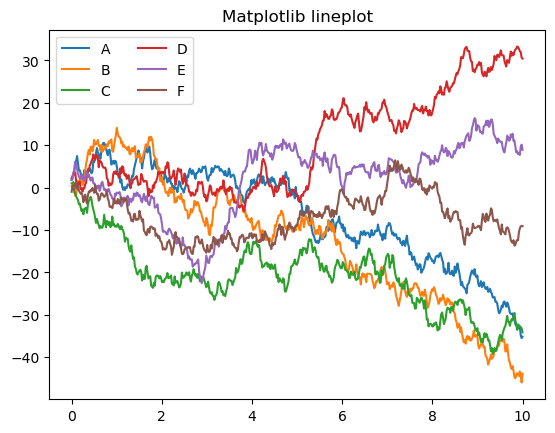

In [26]:
# data creation
import numpy as np

np.random.seed(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)
# print(y)


# plot with Matplotlib defaults
plt.plot(x, y)
plt.title("Matplotlib lineplot")
plt.legend("ABCDEF", ncol=2, loc="upper left")
plt.show()

Let's recreate the same plot in Seaborn. There is only one little extra step to put the input data into a pandas DataFrame - since Seaborn is designed to work with DataFrames! Moreover, the DataFrame should be **tidy**, so in long format.

In [27]:
data = pd.DataFrame(y, index=x, columns=["A", "B", "C", "D", "E", "F"])
data

,A,B,C,D,E,F
0.00000,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278
0.02004,2.714141,0.248800,0.875519,2.651492,2.011602,0.476996
0.04008,3.475178,0.370475,1.319382,2.985166,3.505681,0.271837
0.06012,3.788246,-0.483621,-1.233607,3.638785,4.370117,-0.470328
0.08016,6.058001,-1.937986,-1.187849,3.451601,5.902896,0.999031
...,...,...,...,...,...,...
9.91984,-33.248167,-44.411596,-32.465227,32.749546,8.082951,-10.465950
9.93988,-32.677217,-43.339295,-32.968937,32.162530,7.704773,-9.613061
9.95992,-34.825335,-44.372460,-32.866601,31.938438,9.672503,-9.165378
9.97996,-35.487527,-45.950067,-33.207161,30.635218,10.139254,-9.004272


In [28]:
data = data.reset_index().melt(id_vars="index")
data

,index,variable,value
0,0.00000,A,1.764052
1,0.02004,A,2.714141
2,0.04008,A,3.475178
3,0.06012,A,3.788246
4,0.08016,A,6.058001
...,...,...,...
2995,9.91984,F,-10.465950
2996,9.93988,F,-9.613061
2997,9.95992,F,-9.165378
2998,9.97996,F,-9.004272


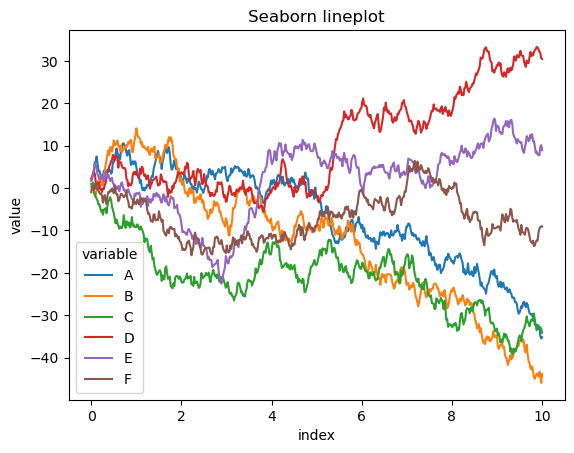

In [29]:
# canonical import
import seaborn as sns

plot = sns.lineplot(x="index", y="value", hue="variable", data=data)
plot.set_title("Seaborn lineplot")
plt.show()

### Exercise

Recreate the plot "Temperatures in Tromsø" using Seaborn instead of Matplotlib.

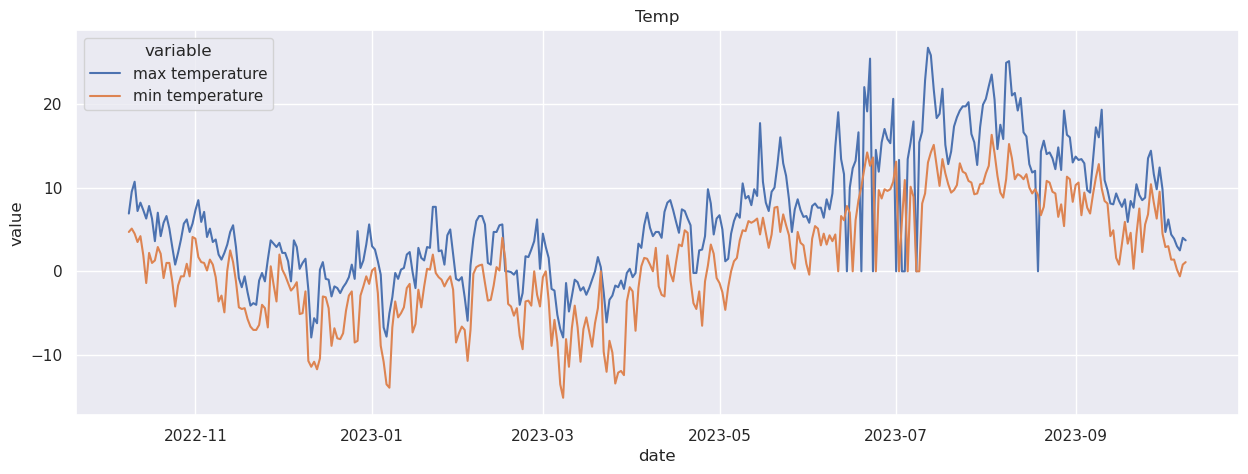

In [40]:

url = "https://raw.githubusercontent.com/coderefinery/data-visualization-python/main/data/tromso-daily.csv"
df_tromso = pd.read_csv(url)
df_tromso["date"] = pd.to_datetime(df_tromso["date"], format="%d.%m.%Y")

data = df_tromso.reset_index().melt(id_vars="date",value_vars=["max temperature","min temperature"])
data

sns.set_theme(rc={'figure.figsize':(15,5)}) # change size

plot = sns.lineplot(x="date", y="value", hue="variable", data=data)
plot.set_title("Temp")
plt.show()

---

Let's experiment now with *plotting multiple data* on the same plot.

As we saw earlier, the `hue='name'` parameter of Seaborn plotting functions automatically breaks down the plots by the categories in the `name` variable of the dataframe.

In [56]:
sns.reset_defaults()

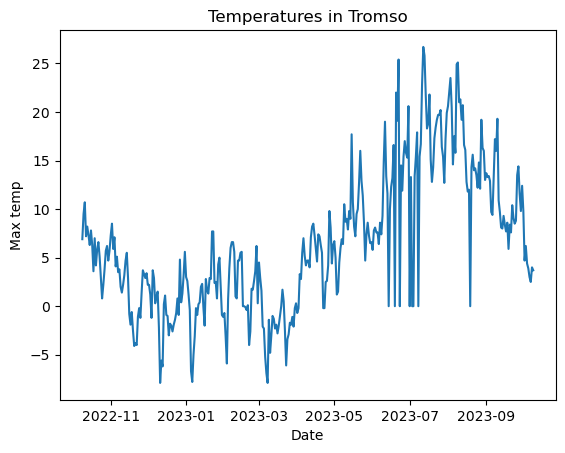

In [57]:
plot = sns.lineplot(x="date", y="max temperature", data=df_tromso)

plot.set_title("Temperatures in Tromso")
plot.set_xlabel("Date")
plot.set_ylabel("Max temp")

plt.show()
# uncomment next line to save the figure
# plot.figure.savefig("temperatures.png")

Let's experiment a little more. What if we wanted the two timeseries in separate panels?

We use the versatile function `sns.relplot()`:

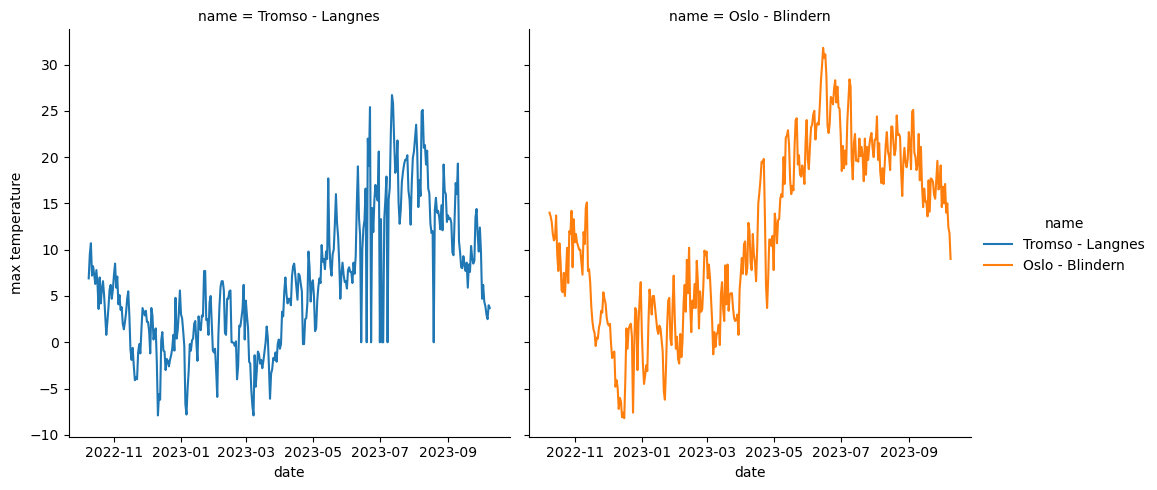

In [58]:
plot = sns.relplot(
    x="date",
    y="max temperature",
    hue="name",
    col="name",  # try commenting this out or changing col to row
    kind="line",
    data=df,
)
plt.show()

# uncomment next line to save the figure
# plot.savefig("temperatures-side-by-side.png")

Note how by changing two lines we can change the data plotted (`x` or `y`) and the plot type (`kind`).

**Your turn!** 

Now plot the snow depth vs. time as a scatter plot instead of a line plot. Optionally save the figure to the file "snow-depth.png".

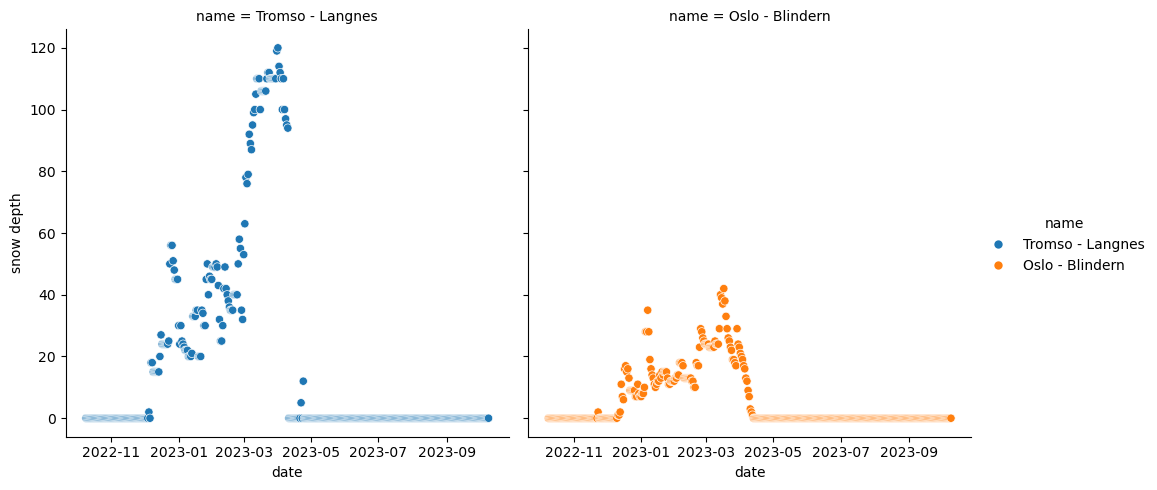

In [59]:
plot = sns.relplot(
    x="date",
    y="snow depth",  # we now plot the snow depth instead of the max temperature
    hue="name",
    col="name",
    kind="scatter",  # we changed "line" to "scatter"
    data=df,
)

plt.show()

---

# More on Matplotlib

## Anatomy of a Figure

![](https://matplotlib.org/stable/_images/anatomy.png)

##  Axes

A figure can have one or more subplots inside it called Axes, arranged in rows and columns. Every figure has at least one Axes. Don't confuse Axes with X and Y axis: they are different!

The Axes objects, such as `ax1` and `ax2` above, are what you think of as 'a plot'.  **Axes** contains two (or three in the case of 3D) **Axis** objects, which take care of the data limits (the data limits can also be controlled via `set_xlim()` and `set_ylim()` Axes methods). 

Each Axes has:

1. a title (set via `set_title()`);
1. a x-label (set via `set_xlabel()`);
1. a y-label (set via `set_ylabel()`).

The Axes class and its member functions are the primary entry point to working with the object-oriented programming (OOP) interface.

## Axis

These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks).


## How to draw two scatterplots in different panels

Suppose I want to draw our two sets of points in two separate plots side-by-side instead of the same plot. 

You can do that by creating two separate subplots, or Axes, using `plt.subplots(1, 2)`: this means to creates 1 row with 2 subplots. The command returns two objects:

1. the figure
1. the axes (subplots) inside the figure

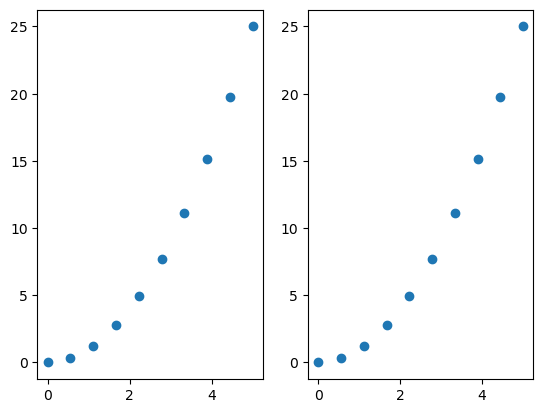

In [60]:
# create some data
x = np.linspace(0, 5, 10)
y = x**2

# Create Figure and Subplots, capturing them in separate variables
fig, axes = plt.subplots(1, 2)

# Grab the individual Axis from the Axes object
ax1 = axes[0]
ax2 = axes[1]

# Plot
ax1.plot(x, y, "o")
ax2.plot(x, y, "o")

plt.show()

The above code seems quite repetitive and can be further optimized:

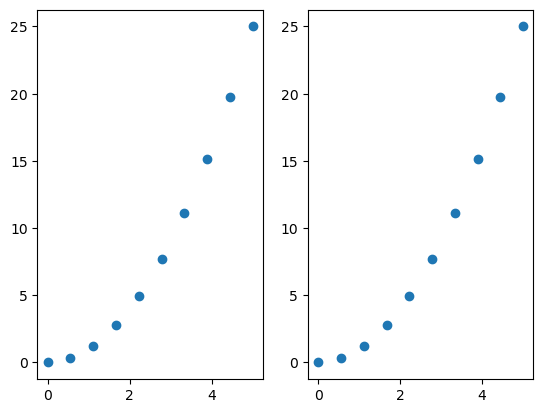

In [61]:
fig, axes = plt.subplots(1, 2)

for ax in axes:
    ax.plot(x, y, "o")

plt.show()

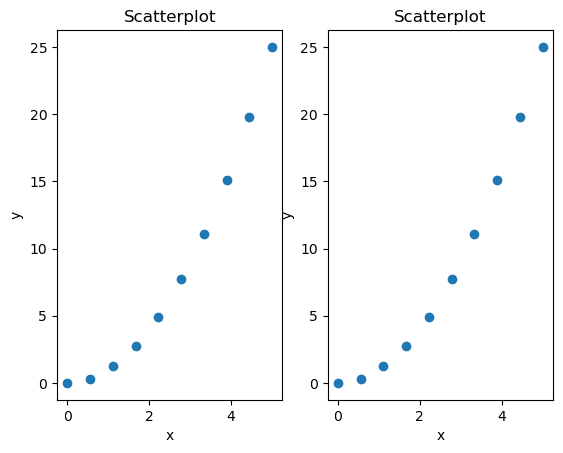

In [62]:
fig, axes = plt.subplots(1, 2)

for ax in axes:
    ax.plot(x, y, "o")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Scatterplot")

plt.show()

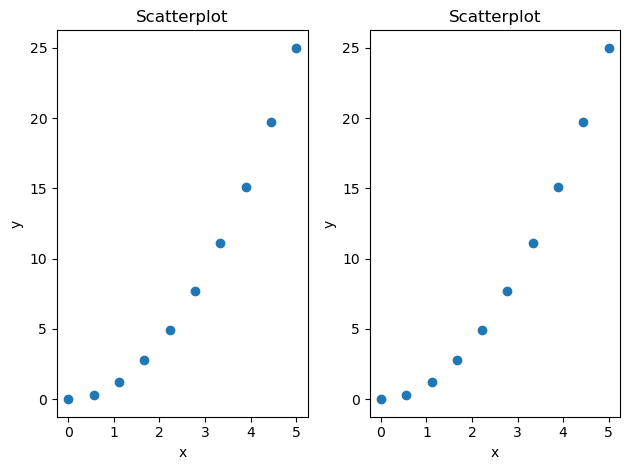

In [63]:
fig, axes = plt.subplots(1, 2)

for ax in axes:
    ax.plot(x, y, "o")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Scatterplot")

fig.tight_layout()
plt.show()

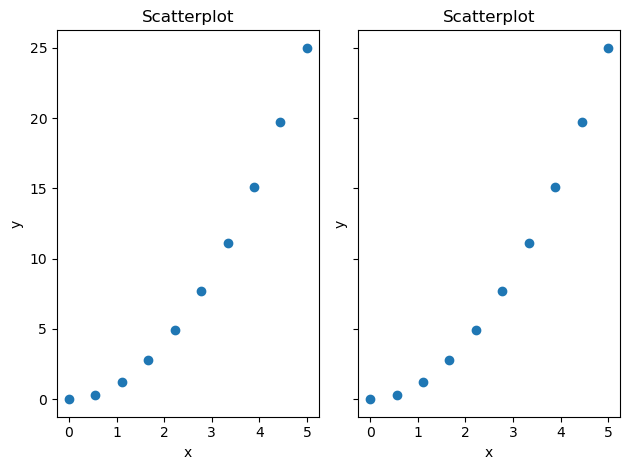

In [64]:
fig, axes = plt.subplots(1, 2, sharey=True)

for ax in axes:
    ax.plot(x, y, 'o')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Scatterplot")

fig.tight_layout()
plt.show()

MATLAB-like to object-oriented equivalencies:

* `plt.xlabel()` → `ax.set_xlabel()`
* `plt.ylabel()` → `ax.set_ylabel()`
* `plt.xlim()` → `ax.set_xlim()`
* `plt.ylim()` → `ax.set_ylim()`
* `plt.title()` → `ax.set_title()`

Alternately, to save keystrokes, you can set multiple things in one go using the `ax.set()`:

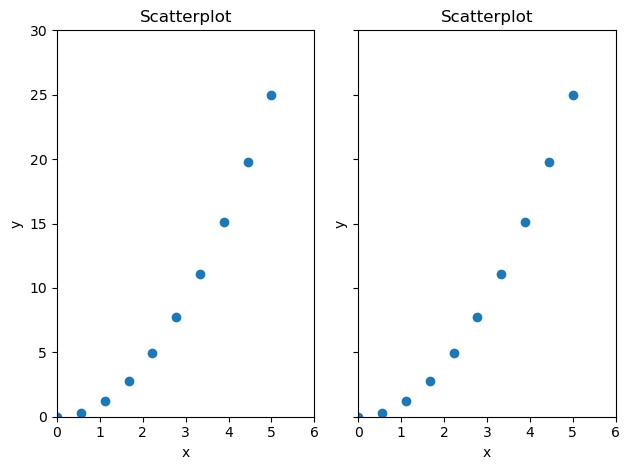

In [65]:
fig, axes = plt.subplots(1, 2, sharey=True)

for ax in axes:
    ax.plot(x, y, "o")
    ax.set(title="Scatterplot", xlabel="x", ylabel="y", xlim=(0, 6), ylim=(0, 30))

fig.tight_layout()
plt.show()

---

# Plotting with Pandas

We can plot pandas dataframes directly! This implicitly uses `matplotlib.pyplot`.

Plotting in pandas is as simple as using a `.plot()` method on a series or dataframe.


In [67]:
from pathlib import Path

DATADIR = Path("data")

bc_data = pd.read_csv(DATADIR / "bc_new_table.txt", sep="\t", index_col=0)
bc_data.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity
id,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980


`pandas` incorporates part of the `matplotlib` library to create quick data visualizations. 

We use the `plot(x, y, kind, data)` function directly on a dataframe `data` and specify the column names we want to plot (`x` and `y` arguments) and the type of plot (`kind`).

Some of the supported `kind`s of plots are:
- 'scatter' for scatterplots,
- 'hist' for histograms,
- 'bar' for vertical barplots,
- 'barh' for horizontal barplots,
- 'box' for boxplots,
- 'kde' for kernel density estimate plots (or simply density plots)

Some kind of plots need both `x` and `y`, others just `y`.

In [74]:
sns.reset_defaults()

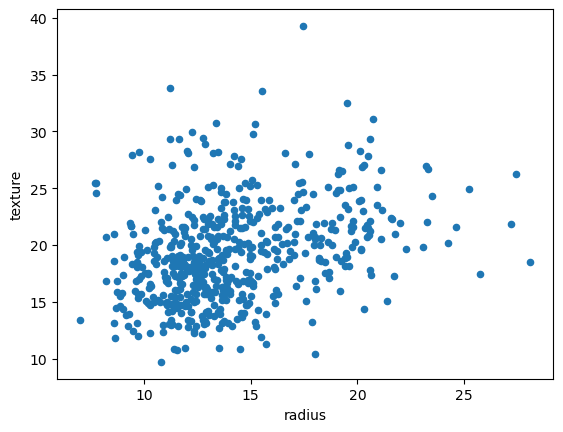

In [75]:
# to build a scatter plot of 'texture' vs 'radius'
bc_data.plot(kind="scatter", x="radius", y="texture")
plt.show()

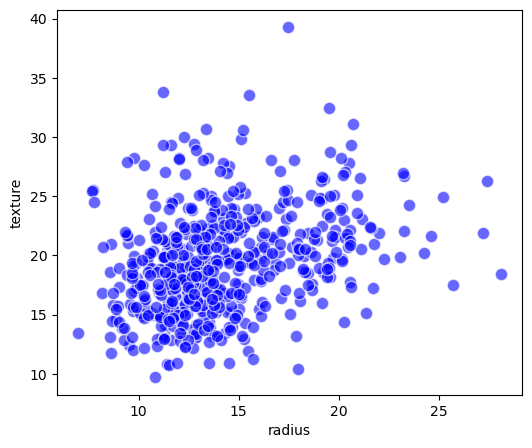

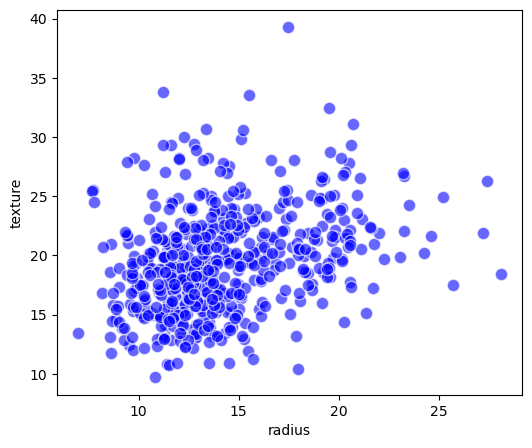

In [77]:
# exploring the parameters we can customize the plot
bc_data.plot(
    kind="scatter",
    x="radius",
    y="texture",
    figsize=(6, 5),  # custom figure size
    alpha=0.6,  # opacity
    color="blue",  # fill color
    edgecolor="w",
    s=80,  # point size
)
plt.show()

What about customizing titles and x/y axis labels? How to save a pandas plot to file?

This has to be done using Matplotlib syntax, as below.

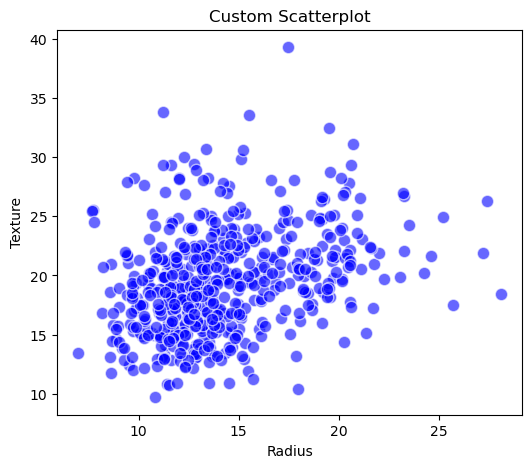

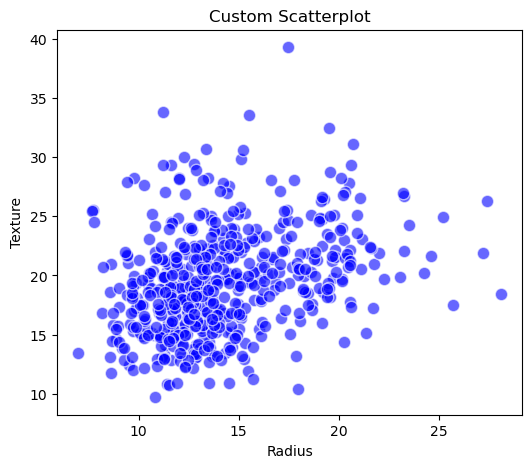

In [90]:
# we need to assign the pandas plot to a variable
plot = bc_data.plot(
    kind="scatter",
    x="radius",
    y="texture",
    figsize=(6, 5),  # custom figure size
    alpha=0.6,  # opacity
    color="blue",  # fill color
    edgecolor="w",
    s=80,  # point size
)

plt.title("Custom Scatterplot")
plt.xlabel("Radius")
plt.ylabel("Texture")

# get the current figure from the plot
fig = plot.get_figure()
# save the current figure to file
fig.savefig("test.png")
plt.show()

### Exercise

Experiment on pandas' `plot` capabilities. 

1. Following the rationale above, first create a histogram of the `radius` variable. Make the bars light blue with black borders.

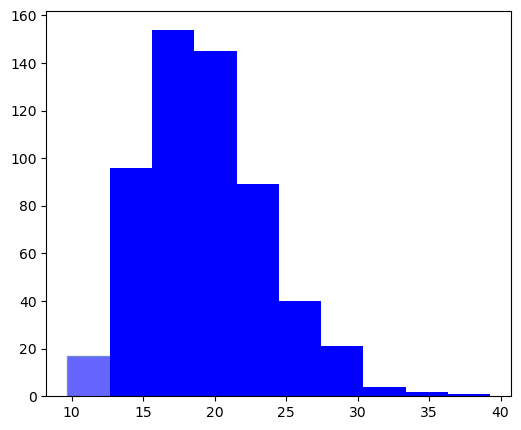

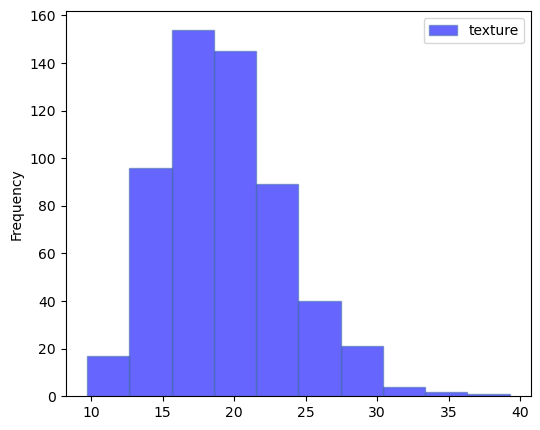

In [93]:
# bc_data.plot(kind="histogram", x="radius", y="texture")
plot = bc_data.plot(
    kind="hist",
    x="texture",
    figsize=(6, 5),  # custom figure size
    alpha=0.6,  # opacity
    color="blue",  # fill color
    edgecolor="b"
)
plt.show()

2. Create an alternate version of the above by selecting the `radius` column from the Pandas dataframe just before calling the `.plot` method. Modify then the `.plot` arguments accordingly. Use the default color for the bars this time, with black borders.

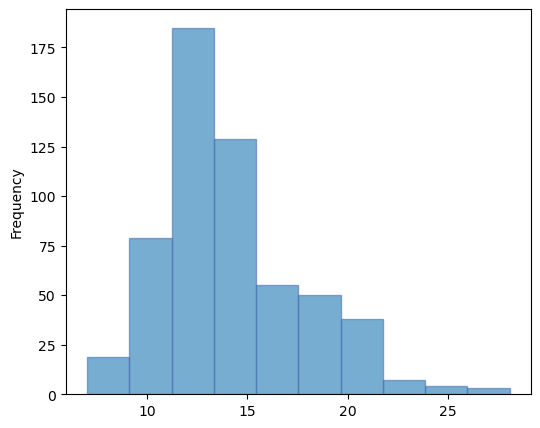

In [95]:
plot = bc_data["radius"].plot(
    kind="hist",
    figsize=(6, 5),  # custom figure size
    alpha=0.6,  # opacity
    edgecolor="b"
)
plt.show()

3. Try plotting multiple histograms on the same plot! One should be light blue and the other orange. 

Hint: (version 1) you can pass more than one column name to the `y` and `color` arguments of the `plot` method. Or (version 2) you can select more than one column from the dataframe and then call `plot`.

Add some transparency (`alpha`) to help discriminating both histograms.

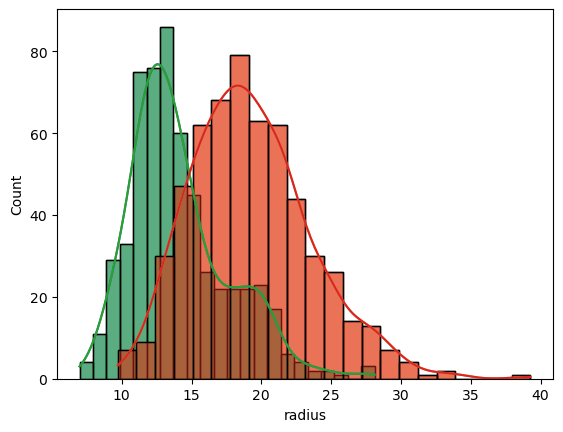

In [97]:
sns.histplot(bc_data, x="radius",kde=True)
sns.histplot(bc_data, x="texture",kde=True)
plt.show()

4. (optional) It is also possible to put the `.plot()` right after some other functions applied to the dataframe: e.g. `df.some_func().plot()`. For example, create a bar plot to visualize the number of benign and malignant diagnoses in the dataset.

Hint: `value_counts()` or `value_counts(normalize=True)`

Make the bars light blue with blue edges.

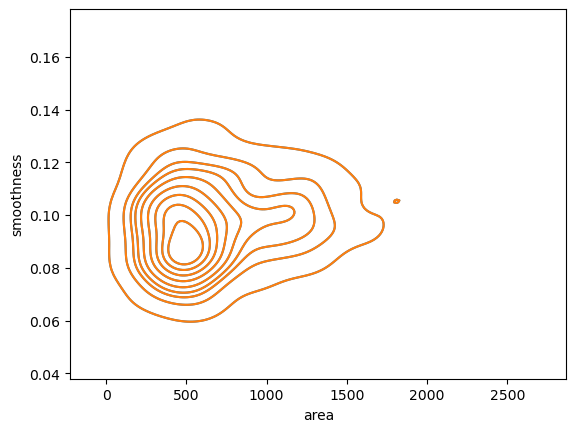

In [100]:
sns.kdeplot(bc_data,x="area", y="smoothness")
plt.show()

---

# Seaborn plot gallery

## Heatmaps

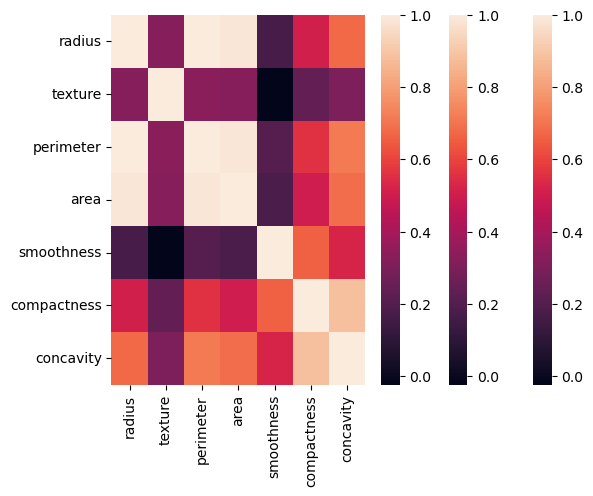

In [80]:
# correlation matrix
corr_table = bc_data.corr(numeric_only=True)

# plot it as a heatmap with searborn
sns.heatmap(corr_table);
plt.show()

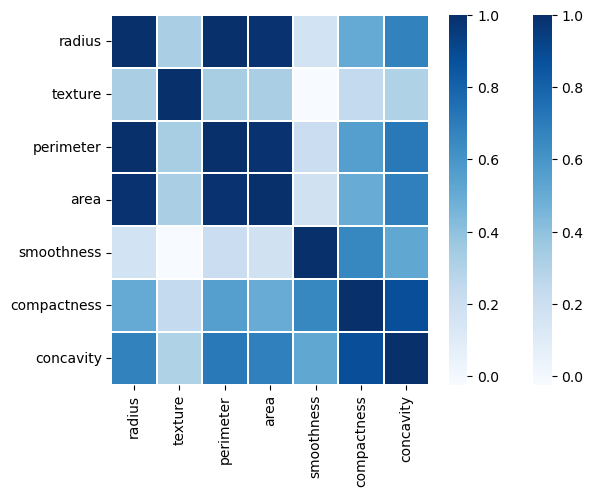

In [82]:
# change a few parameters
sns.heatmap(corr_table, cmap='Blues', linewidth=0.1)

plt.show()

The argument `cmaps` accepts a [matplotlib colormap name](https://matplotlib.org/stable/users/explain/colors/colormaps.html), or list of colors.

## Pair plots

Pair plots, also called "scatterplot matrices", are useful to explore correlations in multidimensional data.

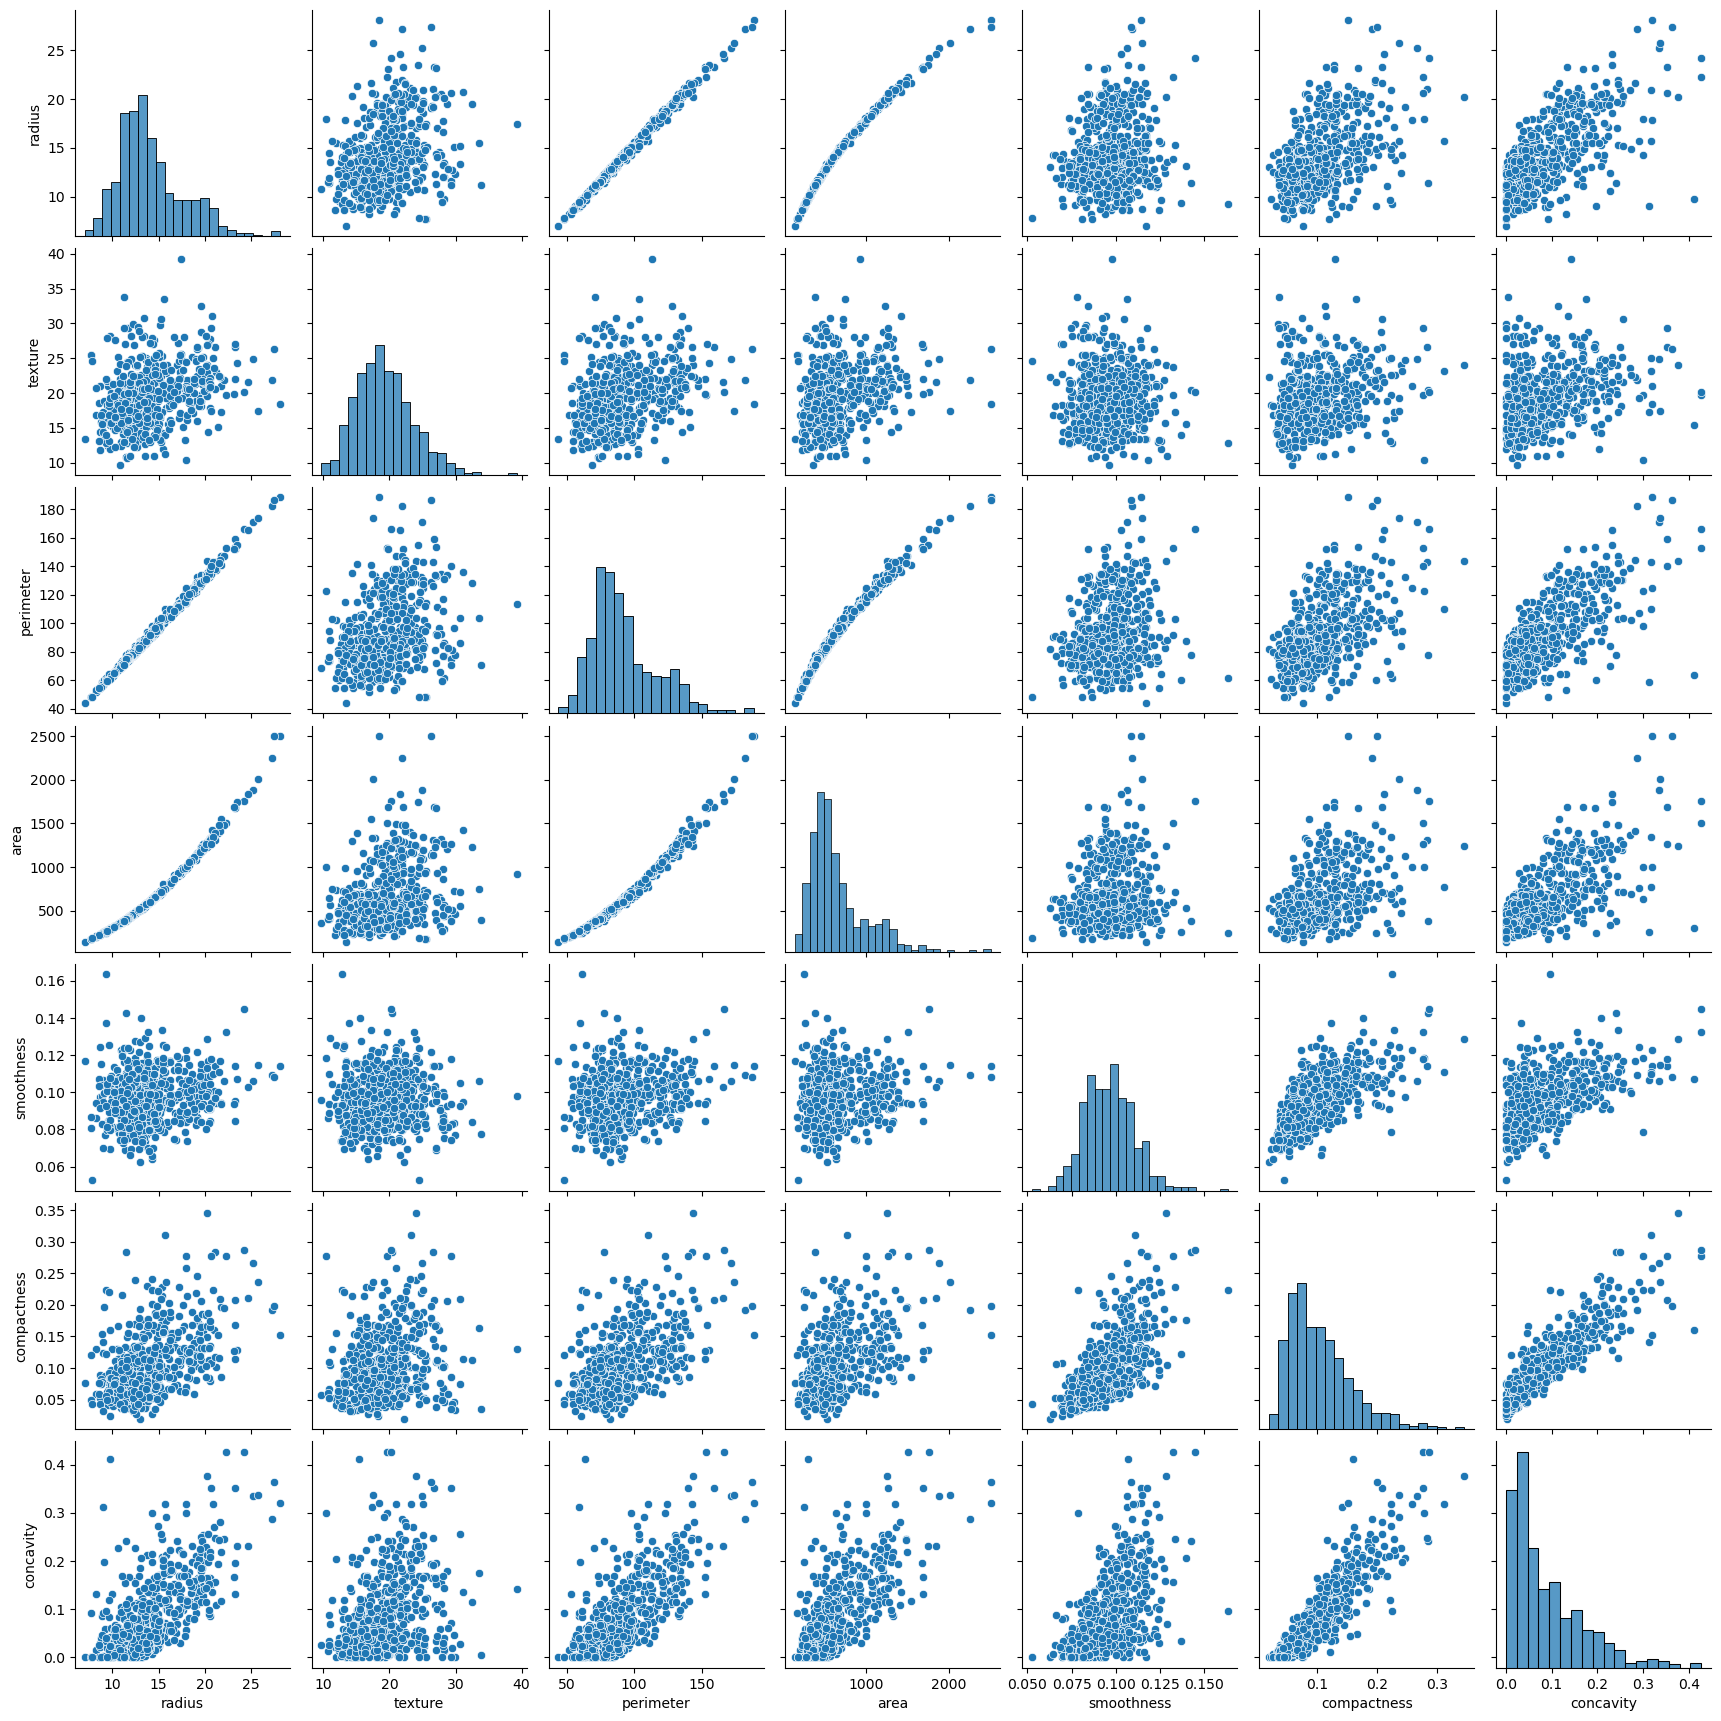

In [83]:
sns.pairplot(bc_data);

plt.show()

## Boxplots

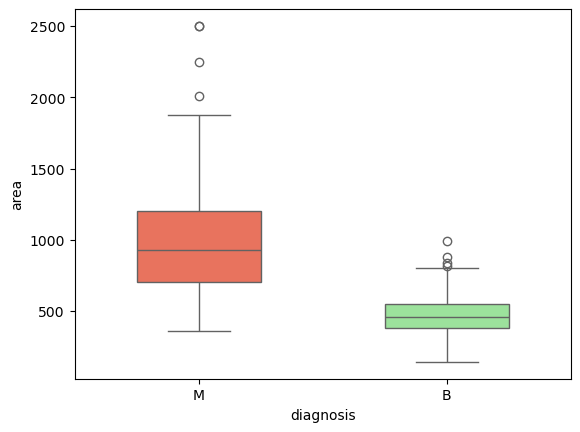

In [88]:
sns.boxplot(y='area', x='diagnosis', hue='diagnosis',
            palette=['tomato', 'lightgreen'],  # colors to use for the levels of the ``hue`` variable
            data=bc_data,
            width=0.5); # ; is used to silence the sns messages

# plt.show() # prefered way to code

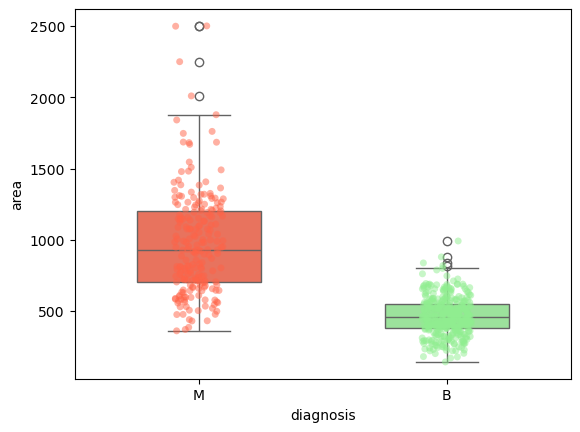

In [85]:
# we can also add a stripplot to make it more informative
sns.boxplot(y='area', x='diagnosis', hue='diagnosis',
            palette=['tomato', 'lightgreen'],
            data=bc_data,
            width=0.5)

sns.stripplot(y='area', x='diagnosis', hue='diagnosis',
              palette=['tomato', 'lightgreen'],
              alpha=0.5,
              data=bc_data)

plt.show()

Notice how Seaborn "adds" plots to the same figure above.

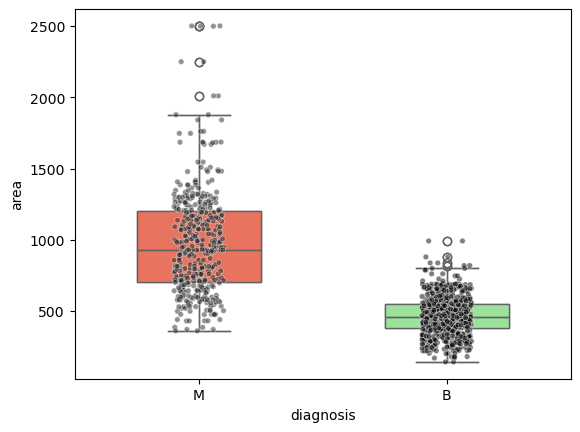

In [87]:
# tweak the plotting parameters to make it more appealing
sns.boxplot(y='area', x='diagnosis', hue='diagnosis',
            palette=['tomato', 'lightgreen'],
            data=bc_data,
            width=0.5)

sns.stripplot(y='area', x='diagnosis', hue='diagnosis',
              palette='dark:black',
              alpha=0.5, size=4, edgecolor='w', linewidth=0.5,
              data=bc_data)

plt.show()

## Histograms and density plots

Seaborn produces histograms with `sns.histplot` and density plots `sns.kdeplot`.

### Exercise

Using the same rationale above, create a histogram of the `radius` variable with Seaborn.

Now, add to the same plot the histogram of the variable `texture`. Hint: see the boxplot example above.

See what happens if you add the optional argument `kde=True`.

Create now a density plot of the variable `area`. Try with and without the optional argument `fill=True`.

What happens if you create a density plot using two variables? e.g. `area` and `smoothness`. Again, try with and without the optional argument `fill=True`.

## Plots with marginal distributions

These are obtained with `sns.jointplot`.

Assigning a `hue` variable will add conditional colors to the plots and an automatic legend.

In [101]:
sns.jointplot(x="concavity", y="texture", data=bc_data);

In [102]:
sns.jointplot(x="concavity", y="texture", hue="diagnosis",
              data=bc_data);

In [103]:
sns.jointplot(x="concavity", y="texture",
              kind="kde", # hist, hex, reg (regression)
              fill=True,
              data=bc_data);

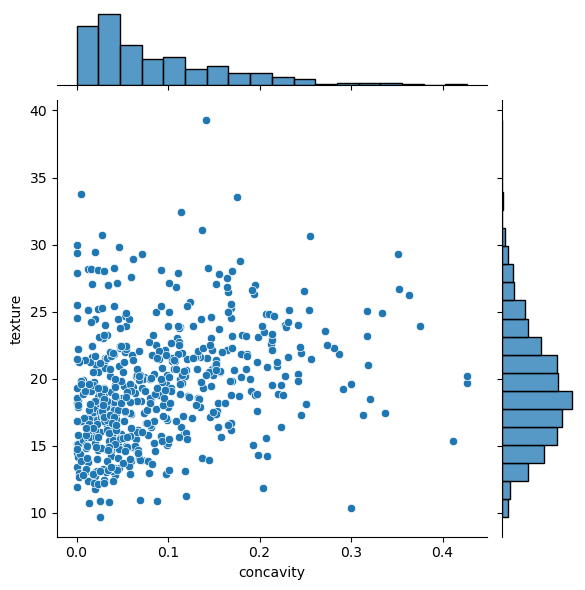

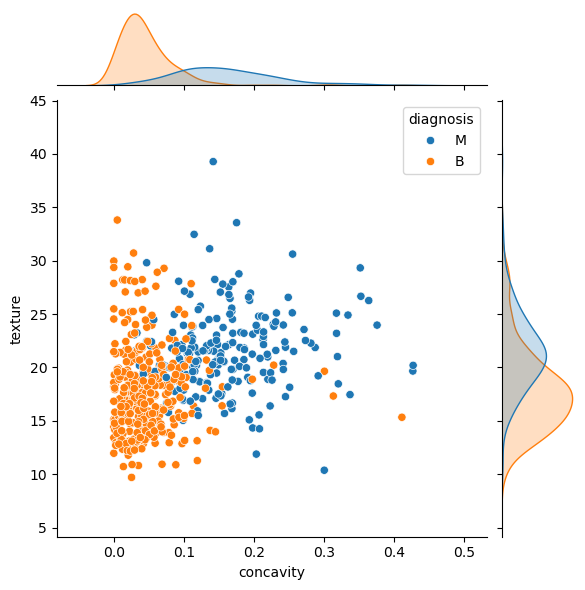

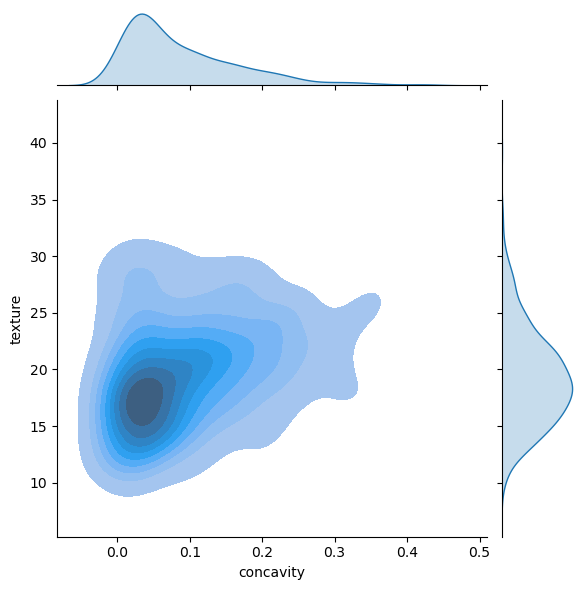

In [104]:
plt.show()

## Faceted plots

To demonstrate faceted plots, we load the dataset "tips" from Seaborn:

In [138]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Before proceeding, we compute the tip percentage and add it as a new `tip_pct` column. Then, we plot it as a histogram using Seaborn, with light gray bars and a black edge.

In [139]:
tips["tip_pct"] = 100 * tips["tip"] / tips["total_bill"]
sns.histplot(data=tips, x="tip_pct", color="lightgray", edgecolor="black")

<Axes: title={'center': 'sex = Female | time = Dinner'}, xlabel='tip_pct', ylabel='Count'>

Now we want to draw 4 histograms of the tip percentage broken down by both `time` (Lunch and Dinner) and `sex` (Male and Female): we would like to have `time` across the columns and `sex` across the rows.

We use seaborn's `FacetGrid()` to create the layout and then we use `map()` on the grid to apply a plotting function (`sns.histplot`) to each facet's subset of the data.

In [107]:
grid = sns.FacetGrid(tips, col="time", row="sex")
grid.map(sns.histplot, "tip_pct");

In [108]:
# margin_titles may not work in all situations
grid = sns.FacetGrid(tips, col="time", row="sex", margin_titles=True)
grid.map(sns.histplot, "tip_pct");

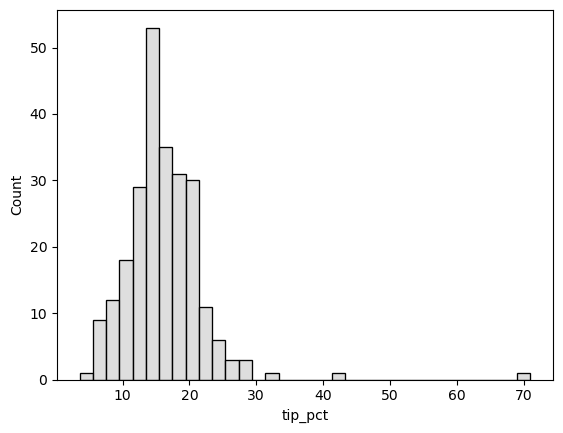

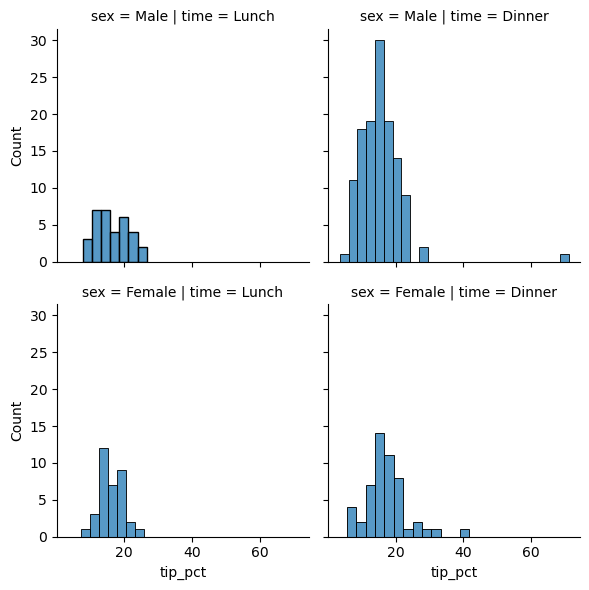

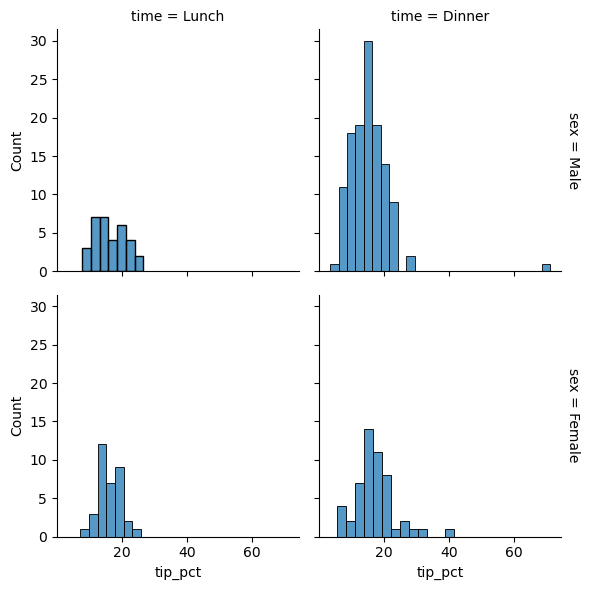

In [109]:
plt.show()

### Exercise (optional)

Following the above examples, try plotting:

1. two scatterplots in one row, showing `tip` vs. `total_bill` faceted by `sex` (on the columns), and colored by `smoker` (use `hue` in the call to `FacetGrid`)

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
tips = sns.load_dataset("tips")

# Create the FacetGrid with hue
g = sns.FacetGrid(data=tips, col="sex", hue="smoker")

# Use map_dataframe to preserve hue
g.map_dataframe(sns.scatterplot, x="tip", y="total_bill", edgecolor="black")

# Add legend and show plot
g.add_legend()
plt.show()

2. four barplots in one row, showing `total_bill` by `sex`, faceted by `day` (on the columns)

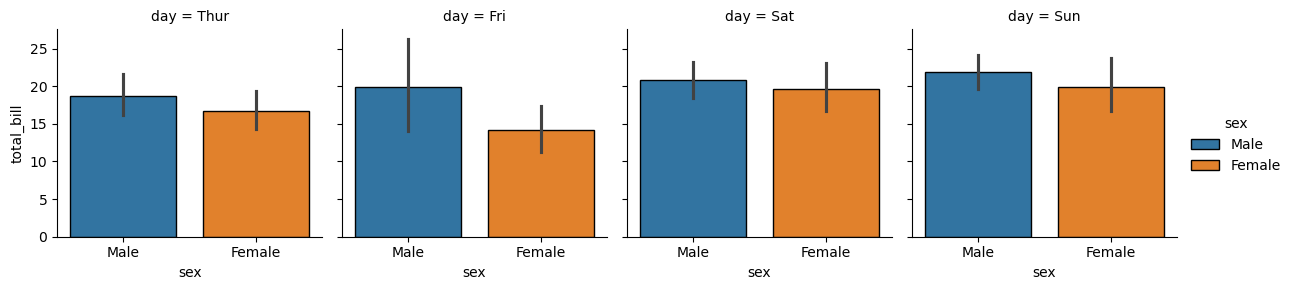

In [147]:
g = sns.FacetGrid(data=tips, col="day", hue="sex")

# Use map_dataframe to preserve hue
g.map_dataframe(sns.barplot, x="sex", y="total_bill", edgecolor="black")

# Add legend and show plot
g.add_legend()
plt.show()

---

# Constructing biologically relevant plots


## Manhattan plot

Manhattan plots are a variation of scatterplots used to display dense data. They typically represent the p-values of an entire genome-wide association study (GWAS) on a genomic scale: $-log10(P)$ on the y axis and chromosomes on the x axis. We'll use the package `qmplot`:

```
!pip install qmplot
```

In [110]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/dash-bio-docs-files/master/manhattan_data.csv')
df.head()

,CHR,BP,P,SNP,ZSCORE,EFFECTSIZE,GENE,DISTANCE
0,1,937641,0.335344,rs9697358,0.9634,-0.0946,ISG15,1068
1,1,1136887,0.245857,rs34945898,1.1605,-0.0947,TNFRSF4,0
2,1,2116240,0.823286,rs12034613,0.2233,-0.0741,FP7162,0
3,1,2310562,0.493204,rs4648633,0.6852,0.0146,MORN1,0
4,1,2681715,0.605392,rs4430271,0.5167,0.1234,MMEL1,127427


In [111]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CHR,14412.0,9.248820e+00,6.285682e+00,1.000000e+00,4.000000e+00,8.000000e+00,1.400000e+01,2.300000e+01
BP,14412.0,7.827018e+07,5.643974e+07,9.222000e+04,3.159827e+07,6.837940e+07,1.154268e+08,2.465864e+08
P,14412.0,4.959331e-01,2.882760e-01,6.750100e-10,2.483034e-01,4.944957e-01,7.434780e-01,9.999448e-01
ZSCORE,14412.0,8.138149e-01,6.393270e-01,1.000000e-04,3.272500e-01,6.832000e-01,1.154475e+00,6.171800e+00
EFFECTSIZE,14412.0,7.555787e-04,1.105600e-01,-1.787300e+00,-6.692500e-02,2.000000e-04,6.750000e-02,2.654900e+00
DISTANCE,14412.0,8.997008e+04,1.969981e+05,-1.000000e+00,0.000000e+00,2.783500e+03,8.004100e+04,1.968847e+06


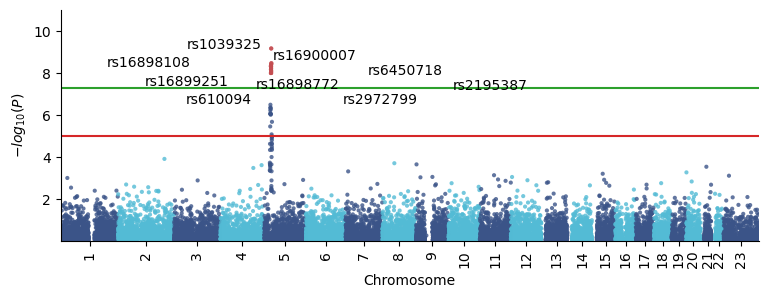

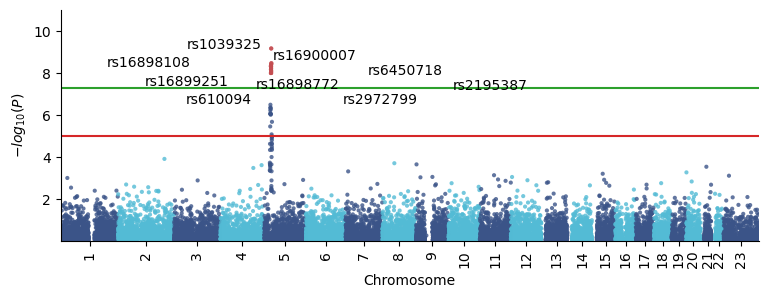

In [114]:
from qmplot import manhattanplot

ax = manhattanplot(
    data=df,
    chrom="CHR",
    pos="BP",
    pv="P",
    snp="SNP",
    xticklabel_kws={"rotation": "vertical"},
    # suggestiveline=None,
    # genomewideline=None,
    # CHR="7",  # single chromosome
    sign_marker_p=1e-8,  # threshold for SNP annotation
    is_annotate_topsnp=True,
)

plt.savefig("output_manhattan_plot.png")
plt.show()

## Volcano plot

Volcano plots are a special case of scatterplots. They are typically used to display the results of a differential gene expression analysis in terms of statistical significance ($-log(P)$) vs. magnitude of change (fold change, effect size).

In [115]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/dash-bio-docs-files/master/volcano_data1.csv')
df.head()

,CHR,BP,P,SNP,ZSCORE,EFFECTSIZE,GENE,DISTANCE
0,1,937641,0.335344,rs9697358,0.9634,-0.0946,ISG15,1068
1,1,1136887,0.245857,rs34945898,1.1605,-0.0947,TNFRSF4,0
2,1,2116240,0.823286,rs12034613,0.2233,-0.0741,FP7162,0
3,1,2310562,0.493204,rs4648633,0.6852,0.0146,MORN1,0
4,1,2681715,0.605392,rs4430271,0.5167,0.1234,MMEL1,127427


In [116]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CHR,9934.0,1.048581e+01,4.745231e+00,1.000000e+00,7.000000e+00,1.000000e+01,1.400000e+01,2.300000e+01
BP,9934.0,6.917571e+07,4.746926e+07,9.222000e+04,2.858781e+07,6.258858e+07,1.034014e+08,1.903753e+08
P,9934.0,4.953984e-01,2.899049e-01,6.750100e-10,2.451733e-01,4.937123e-01,7.442073e-01,9.997417e-01
ZSCORE,9934.0,8.214932e-01,6.616892e-01,3.000000e-04,3.262500e-01,6.844000e-01,1.162150e+00,6.171800e+00
EFFECTSIZE,9934.0,7.474431e-04,1.145555e-01,-1.787300e+00,-6.750000e-02,-3.000000e-04,6.690000e-02,2.654900e+00
DISTANCE,9934.0,9.224822e+04,1.976067e+05,-1.000000e+00,0.000000e+00,4.626000e+03,8.538475e+04,1.873521e+06


In [117]:
df["-log10P"] = -np.log10(df["P"])

In [118]:
# determine "top genes" based on sensible thresholds
condition = (df["EFFECTSIZE"] >= 1) & (df["-log10P"] > 7)
# add a column
df["signif"] = "ns"
df.loc[condition, "signif"] = "Up"

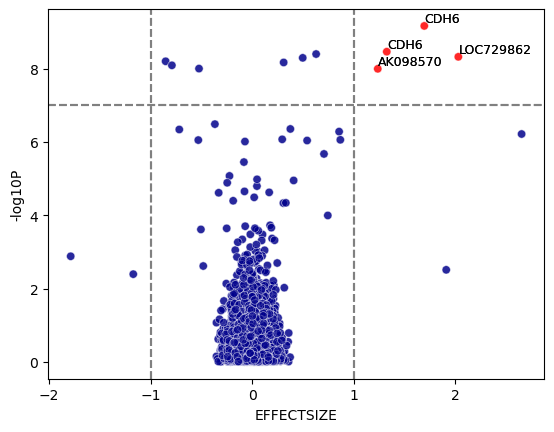

In [120]:
ax = sns.scatterplot(
    df,
    x="EFFECTSIZE",
    y="-log10P",
    hue="signif",
    palette={"Up": "red", "ns": "darkblue"},  # optional palette
    alpha=0.6,
    legend=None,
)

ax.axvline(x=1, color="grey", linestyle="--")
ax.axvline(x=-1, color="grey", linestyle="--")
ax.axhline(y=7, color="grey", linestyle="--")

df_top = df.loc[condition]
for _, row in df_top.iterrows():
    ax.text(row["EFFECTSIZE"], row['-log10P']+0.1, row["GENE"], fontsize=9)

plt.show()

## Clustergram: heatmap + dendrogram

Clustergrams are typically used for gene expression data. The hierarchical clustering represented by the dendrograms can be used to identify groups of genes with related expression levels represented by the heatmap.

In [121]:
df = pd.read_csv("data/hbr_uhr_top_deg_normalized_counts.csv", index_col=0)
df.head()

,HBR_1,HBR_2,HBR_3,UHR_1,UHR_2,UHR_3
SULT4A1,375.0,343.6,339.4,3.5,6.9,2.6
MPPED1,157.8,158.4,162.6,0.7,3.0,2.6
PRAME,0.0,0.0,0.0,568.9,467.3,519.2
IGLC2,0.0,0.0,0.0,488.6,498.0,457.5
IGLC3,0.0,0.0,0.0,809.7,313.8,688.0


In [122]:
df.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
HBR_1,12.0,59.058333,110.507922,0.0,0.000,1.3,59.150,375.0
HBR_2,12.0,57.008333,102.924566,0.0,0.000,0.5,65.325,343.6
HBR_3,12.0,56.675000,101.579500,0.0,0.000,1.2,59.250,339.4
UHR_1,12.0,189.916667,275.514193,0.0,1.225,55.7,238.400,809.7
UHR_2,12.0,146.608333,182.649438,0.0,2.750,80.2,194.250,498.0


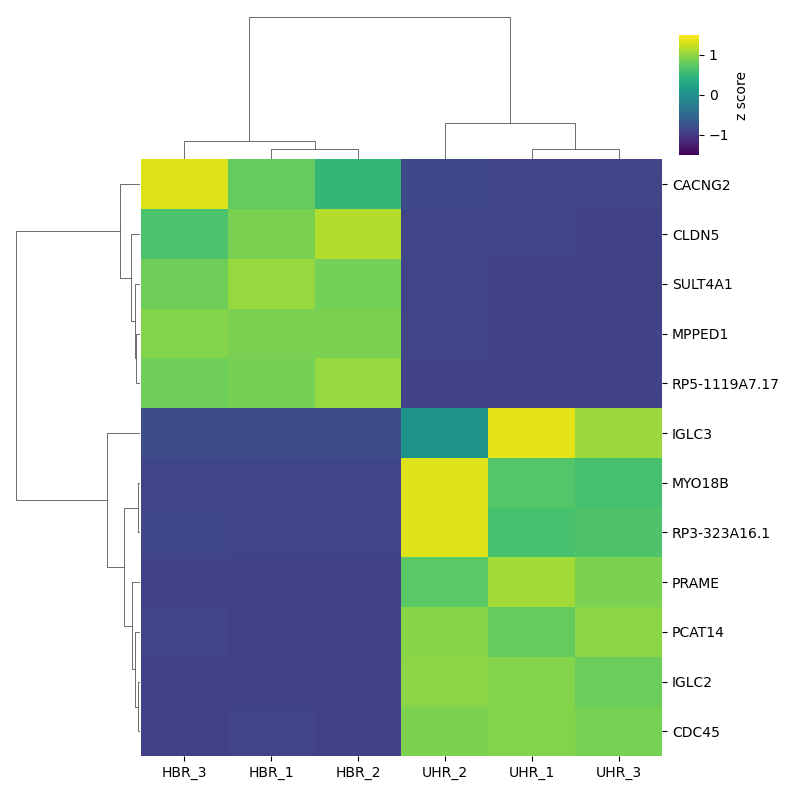

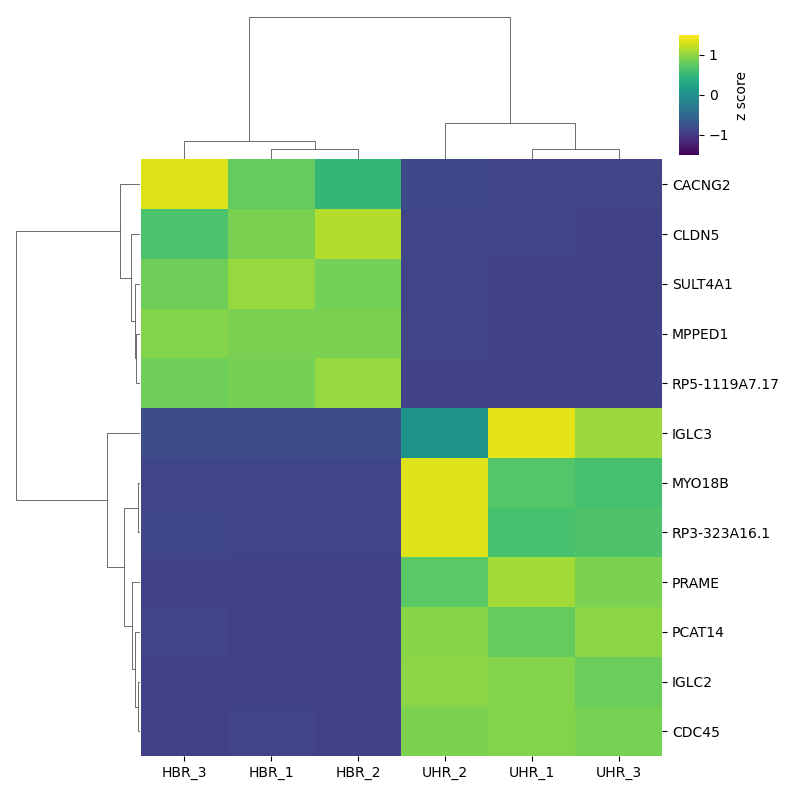

In [124]:
sns.clustermap(
    df,
    z_score=0,  # scale the rows by z-score (1 = scale the columns)
    cmap="viridis",  # custom color palette
    figsize=(8, 8),
    vmin=-1.5,  # min value on the colorbar
    vmax=1.5,  # max value on the colorbar
    cbar_kws=({"label": "z score"}),  # dict that specifies the title to the colorbar
    cbar_pos=(0.855, 0.8, 0.025, 0.15),  # optional position of the colorbar axes in the figure (left, bottom, width, height)
)
plt.show()

---

# Enrichment analysis

Suppose you have gene expression data for a cohort of patients. The data were collected before and after an intervention. You identified a bunch of differentially expressed genes (DEGs) between the two conditions.

There are a lot of web tools that you can consider as query databases, such as: DAVID, Ingenuity Pathway Analysis, Enrichr, GSEA, Reactome, KEGG... to name a few!

Here we'll set up an enrichment pipeline based on two ingredients: Enrichr and [GSEApy](https://gseapy.readthedocs.io/en/latest/introduction.html).

Enrichr is a user-friendly and free to use database and allows querying of gene lists against a repertoire of gene-set libraries. GSEApy is a Python wrapper for Enrichr, allowing users to query the characteristics of your DEGs within Python.

To install GSEApy, run this command in the below code cell:

```
!pip install gseapy
```

In [ ]:
import gseapy as gp
import matplotlib.pyplot as plt

Enrichr allows you to query across multiple databases.

In [ ]:
names = gp.get_library_name()
print(names)

As a proof of concept, we will use the transcriptomics dataset published by [Zak et al., PNAS, 2012](https://www.pnas.org/content/109/50/E3503), examining how seropositive and seronegative subjects respond to the Ad5 vaccine across various time points.

The fold change, ratio, p-value and adjusted p-values (q-value) are calculated with respect to baseline (timepoint=0). We will filter for "up" and "down" DEGs based on fold-change > 1.5, q-value < 0.05 and fold-change < -1.5, q-value < 0.05 respectively at day 1 post-vaccination using the commands as follows:

In [ ]:
df = pd.read_csv("data/Ad5_seroneg.csv", index_col=0)

DEGs_up = (df[(df["fc_1d"] > 1.5) & (df["qval_1d"] < 0.05)]).index.tolist()
DEGs_down = (df[(df["fc_1d"] < -1.5) & (df["qval_1d"] < 0.05)]).index.tolist()

Very popular databases are Gene Ontology (GO) and Reactome. GO Biological Processes (GOBP), GO Molecular Functions (GOMF) and GO Cellular Components (GOCC) usually provide users a rough idea of what the DEGs do, and their localisation within the cell. Here we will query the upregulated DEGs against GO Biological Processes (look at the `names` variable above to find out the exact string corresponding to this db).

In [ ]:
enr_GOBP_up = gp.enrichr(
    gene_list=DEGs_up,
    gene_sets=["GO_Biological_Process_2025"],  # or "GO_Cellular_component_2025", "Reactome_2022", ...
    organism="Human",
    outdir="out/enr_DEGs_GOBP_up",  # modify this accordingly
    cutoff=0.05,
)

# enr_Reactome_up = gp.enrichr(...)

GSEApy has built-in plotting functions:

In [ ]:
from gseapy.plot import barplot, dotplot

barplot(enr_GOBP_up.res2d, title='GO BP seroneg day 1 (up)', color='r');

---

# Credits

Partially abridged from "Python for Scientific Computing" course (Aalto Scientific Computing, 2020), [Top 50 matplotlib Visualizations – The Master Plots](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)), [Arthur Turrell](https://aeturrell.github.io/coding-for-economists/vis-common-plots.html), [Machine Learning Plus](https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/), [matplotlib.org](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py), & Biopython tutorial.

---

# Further resources

- [The Python graph gallery](https://www.python-graph-gallery.com/): a great site with 100s of charts made with Python using mostly Matplotlib and Seaborn, organized in multiple sections with their associated reproducible code.
- [Matplotlib tutorials](https://matplotlib.org/stable/tutorials/index)
- [Seaborn gallery](https://seaborn.pydata.org/examples/index.html)